In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
df = pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [10]:
df_copy = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [14]:
df_copy = df_copy[df_copy['Country'] == 'United Kingdom']

In [16]:
df_copy.dropna(inplace = True)

<ipython-input-16-cb1790df32ad>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [19]:
df_copy.describe()

,Quantity,UnitPrice,CustomerID
count,354321.000000,354321.000000,354321.000000
mean,12.013795,2.963994,15552.486392
std,189.267956,17.862655,1594.527150
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [27]:
df_copy[(df_copy['UnitPrice']> 2000) | (df_copy['Quantity'] > 300)]

Int64Index([   181,    182,    730,    870,   2364,   3917,   4503,   4850,
              4945,   4946,
            ...
            533739, 533741, 533812, 537883, 540059, 540060, 540061, 540070,
            540071, 540421],
           dtype='int64', length=730)

In [28]:
df_copy.drop(df_copy[(df_copy['UnitPrice']> 2000) | (df_copy['Quantity'] > 300)].index , inplace = True)

<ipython-input-28-bf9f2d9765ba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
df_copy.describe()

,Quantity,UnitPrice,CustomerID
count,353591.000000,353591.000000,353591.000000
mean,10.220189,2.922643,15551.423837
std,19.710246,8.656534,1593.944214
min,1.000000,0.001000,12747.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15521.000000
75%,12.000000,3.750000,16931.000000
max,300.000000,1867.860000,18287.000000


In [30]:
df_copy['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [31]:
df_copy['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [32]:
df_copy['date'] = df_copy['InvoiceDate'].dt.strftime('%Y-%m')

<ipython-input-32-8d5d9b8047b4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [39]:
total_product_sold = df_copy.groupby('date')[['Quantity']].sum()
total_product_sold

,Quantity
date,
2010-12,232089
2011-01,180268
2011-02,180221
2011-03,239146
2011-04,219454
2011-05,271687
2011-06,247973
2011-07,272171
2011-08,267496


Text(0, 0.5, 'sales products')

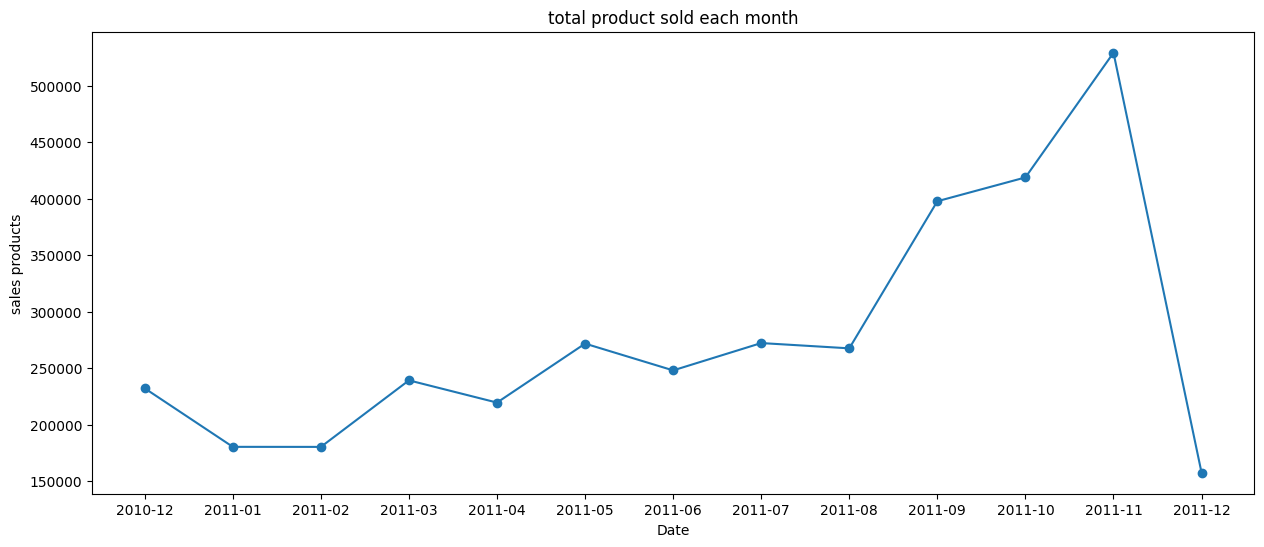

In [38]:
plt.figure(figsize=[15,6])
plt.plot(total_product_sold.index , total_product_sold['Quantity'], marker = 'o')
plt.title('total product sold each month')
plt.xlabel('Date')
plt.ylabel('sales products')

In [40]:
df_copy['total_price'] = df_copy['Quantity'] * df_copy['UnitPrice']

In [41]:
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [42]:
max_date = max(df_copy['InvoiceDate']).date()
max_date

datetime.date(2011, 12, 9)

In [51]:
from datetime import datetime , date
rfm_table = df_copy.groupby('CustomerID').agg({ 'InvoiceDate' : lambda x : (datetime.strptime(str(max_date),'%Y-%m-%d') - x.max()).days +2,
                                                'InvoiceNo' : lambda x : len(x),
                                                'total_price' : lambda x : sum(x)

})
rfm_table

,InvoiceDate,InvoiceNo,total_price
CustomerID,,,
12747.0,3,103,4196.01
12748.0,1,4592,33211.53
12749.0,4,199,4090.88
12820.0,4,59,942.34
12821.0,215,6,92.72
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [52]:
rfm_table.rename(columns = {'InvoiceDate': 'Recency' , 'InvoiceNo' : 'Frequancy', 'total_price' : 'Monetary'}, inplace = True)
rfm_table

,Recency,Frequancy,Monetary
CustomerID,,,
12747.0,3,103,4196.01
12748.0,1,4592,33211.53
12749.0,4,199,4090.88
12820.0,4,59,942.34
12821.0,215,6,92.72
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [53]:
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'] , 4 , [4, 3 , 2 , 1])
rfm_table['f_score'] = pd.qcut(rfm_table['Frequancy'], 4 , [1, 2 ,3 ,4])
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], 4 , [1, 2 ,3 ,4])

In [54]:
rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score
CustomerID,,,,,,
12747.0,3,103,4196.01,4,4,4
12748.0,1,4592,33211.53,4,4,4
12749.0,4,199,4090.88,4,4,4
12820.0,4,59,942.34,4,3,3
12821.0,215,6,92.72,1,1,1
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,12,178.05,4,1,1


In [55]:
rfm_table['rfm_score'] = 100* rfm_table['r_score'].astype(int) + 10*rfm_table['f_score'].astype(int) + rfm_table['m_score'].astype(int)
rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score,rfm_score
CustomerID,,,,,,,
12747.0,3,103,4196.01,4,4,4,444
12748.0,1,4592,33211.53,4,4,4,444
12749.0,4,199,4090.88,4,4,4,444
12820.0,4,59,942.34,4,3,3,433
12821.0,215,6,92.72,1,1,1,111
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111
18281.0,181,7,80.82,1,1,1,111
18282.0,8,12,178.05,4,1,1,411


In [56]:
rfm_table['first_segment'] = pd.qcut(rfm_table['rfm_score'] , 4 , ['bronz' , 'silver' , 'gold' , 'platinum'])
rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score,rfm_score,first_segment
CustomerID,,,,,,,,
12747.0,3,103,4196.01,4,4,4,444,platinum
12748.0,1,4592,33211.53,4,4,4,444,platinum
12749.0,4,199,4090.88,4,4,4,444,platinum
12820.0,4,59,942.34,4,3,3,433,platinum
12821.0,215,6,92.72,1,1,1,111,bronz
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,bronz
18281.0,181,7,80.82,1,1,1,111,bronz
18282.0,8,12,178.05,4,1,1,411,gold


<Axes: xlabel='first_segment', ylabel='count'>

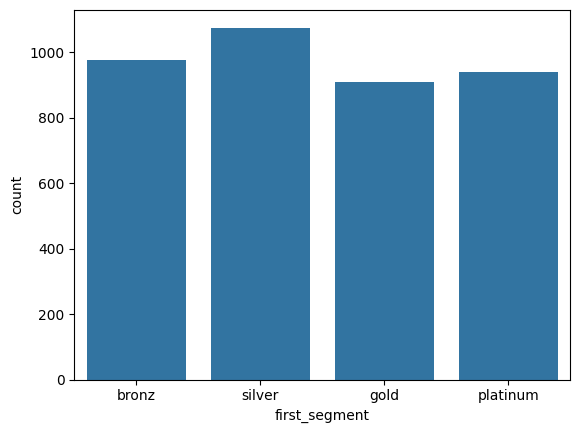

In [57]:
sns.countplot(x='first_segment', data = rfm_table)

In [58]:
def customer_segmentation(rfm_score):
  if rfm_score ==444:
    return 'VIP customer'
  elif rfm_score >= 443 and rfm_score < 444:
    return 'Loyal customer'
  elif rfm_score >=421 and rfm_score < 443:
    return 'become a loyal customer'
  elif rfm_score >=344 and rfm_score < 421:
    return 'recent customer'
  elif rfm_score >=323 and rfm_score < 344:
    return 'potential customer'
  elif rfm_score >=224 and rfm_score<311:
    return 'high risk to churn'
  else:
    return 'loosing customer'
rfm_table['customer_segmentation'] = rfm_table['rfm_score'].apply(customer_segmentation)
rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score,rfm_score,first_segment,customer_segmentation
CustomerID,,,,,,,,,
12747.0,3,103,4196.01,4,4,4,444,platinum,VIP customer
12748.0,1,4592,33211.53,4,4,4,444,platinum,VIP customer
12749.0,4,199,4090.88,4,4,4,444,platinum,VIP customer
12820.0,4,59,942.34,4,3,3,433,platinum,become a loyal customer
12821.0,215,6,92.72,1,1,1,111,bronz,loosing customer
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,bronz,loosing customer
18281.0,181,7,80.82,1,1,1,111,bronz,loosing customer
18282.0,8,12,178.05,4,1,1,411,gold,recent customer


<Axes: xlabel='count', ylabel='customer_segmentation'>

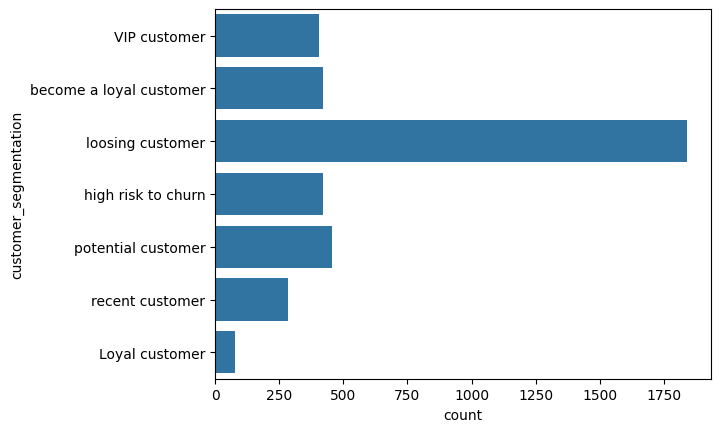

In [59]:
sns.countplot(rfm_table['customer_segmentation'])

In [60]:
final_df = pd.merge(df_copy , rfm_table , left_on='CustomerID' , right_on='CustomerID' , how = 'inner')
final_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,total_price,Recency,Frequancy,Monetary,r_score,f_score,m_score,rfm_score,first_segment,customer_segmentation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,373,297,5391.21,1,4,4,144,bronz,loosing customer
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,373,297,5391.21,1,4,4,144,bronz,loosing customer
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,373,297,5391.21,1,4,4,144,bronz,loosing customer
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,373,297,5391.21,1,4,4,144,bronz,loosing customer
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,373,297,5391.21,1,4,4,144,bronz,loosing customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353586,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,2011-12,2.95,2,12,227.39,4,1,1,411,gold,recent customer
353587,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08 14:58:00,1.25,14569.0,United Kingdom,2011-12,2.50,2,12,227.39,4,1,1,411,gold,recent customer
353588,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08 14:58:00,2.10,14569.0,United Kingdom,2011-12,2.10,2,12,227.39,4,1,1,411,gold,recent customer
353589,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,2011-12,5.90,2,12,227.39,4,1,1,411,gold,recent customer


In [64]:
data = rfm_table[['Recency' , 'Frequancy' , 'Monetary']].reset_index()
data

,CustomerID,Recency,Frequancy,Monetary
0,12747.0,3,103,4196.01
1,12748.0,1,4592,33211.53
2,12749.0,4,199,4090.88
3,12820.0,4,59,942.34
4,12821.0,215,6,92.72
...,...,...,...,...
3898,18280.0,278,10,180.60
3899,18281.0,181,7,80.82
3900,18282.0,8,12,178.05
3901,18283.0,4,756,2094.88


In [67]:
data_updated = data.drop('CustomerID' , axis = 1)

In [68]:
data_updated.head()

,Recency,Frequancy,Monetary
0,3,103,4196.01
1,1,4592,33211.53
2,4,199,4090.88
3,4,59,942.34
4,215,6,92.72


In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = sc.fit_transform(data_updated)

## KMEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Text(0, 0.5, 'WCSS')

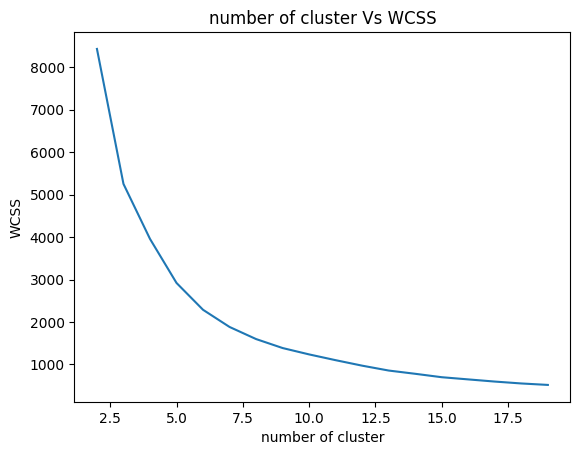

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
scores = []

for i in range(2 , 20):
  kmean = KMeans(n_clusters = i)
  y_kmean = kmean.fit_predict(data_scaled)
  wcss.append(kmean.inertia_)
  scores.append(silhouette_score(data_scaled,y_kmean))


plt.plot(range(2,20),wcss)
plt.title('number of cluster Vs WCSS')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')

Text(0, 0.5, 'silhouette_score')

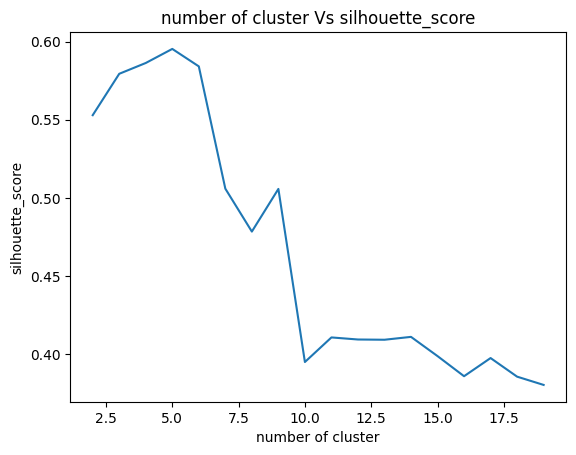

In [72]:
plt.plot(range(2,20),scores)
plt.title('number of cluster Vs silhouette_score')
plt.xlabel('number of cluster')
plt.ylabel('silhouette_score')

In [73]:
kmean = KMeans(n_clusters = 5)
y_kmean = kmean.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[Text(0.5, 1.0, 'tsne on data with cluster label')]

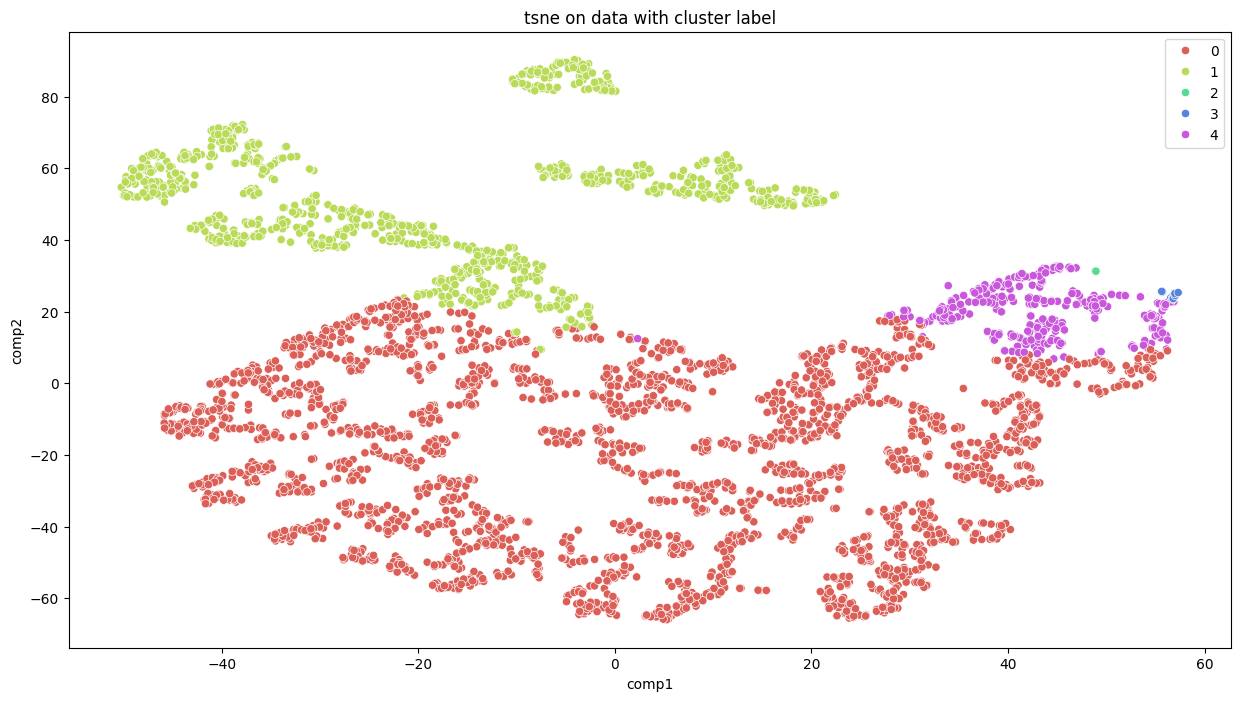

In [75]:
from sklearn.manifold import TSNE
z = TSNE(n_components = 2 , random_state = 42).fit_transform(data_scaled)
df2 = pd.DataFrame()
df2['comp1'] = z[:,0]
df2['comp2'] = z[:,1]
df2['y'] = y_kmean

plt.figure(figsize=[15,8])
sns.scatterplot(x="comp1", y="comp2", hue=df2.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df2).set(title="tsne on data with cluster label")

In [76]:
final_data_kmean = pd.concat([data, pd.DataFrame(y_kmean, columns=['label'])], axis = 1)
final_data_kmean

,CustomerID,Recency,Frequancy,Monetary,label
0,12747.0,3,103,4196.01,0
1,12748.0,1,4592,33211.53,2
2,12749.0,4,199,4090.88,0
3,12820.0,4,59,942.34,0
4,12821.0,215,6,92.72,1
...,...,...,...,...,...
3898,18280.0,278,10,180.60,1
3899,18281.0,181,7,80.82,1
3900,18282.0,8,12,178.05,0
3901,18283.0,4,756,2094.88,4


In [79]:
final_data_kmean.drop('CustomerID',axis=1).groupby('label').describe().T

label                      0            1             2              3  \
Recency   count  2643.000000   956.000000      3.000000      11.000000   
          mean     45.404843   248.471757      2.666667       8.090909   
          std      36.567261    65.495168      2.081666      10.774549   
          min       1.000000   146.000000      1.000000       1.000000   
          25%      16.000000   191.000000      1.500000       3.000000   
          50%      34.000000   243.000000      2.000000       4.000000   
          75%      67.000000   298.000000      3.500000       9.000000   
          max     157.000000   374.000000      5.000000      39.000000   
Frequancy count  2643.000000   956.000000      3.000000      11.000000   
          mean     68.052970    27.742678   5850.000000     855.363636   
          std      61.864124    32.187453   1748.813026     749.830817   
          min       1.000000     1.000000   4592.000000     218.000000   
          25%      21.000000     9.000000   4851.500000     321.500000   
          50%      48.000000    18.000000   5111.000000     546.000000   
          75%      98.000000    33.000000   6479.000000    1297.000000   
          max     330.000000   297.000000   7847.000000    2379.000000   
Monetary  count  2643.000000   956.000000      3.000000      11.000000   
          mean   1124.921515   441.462020  46455.963333   71208.939091   
          std    1106.778328   599.852292  16662.754935   40364.271652   
          min       6.200000     2.900000  33211.530000   47758.250000   
          25%     354.120000   160.890000  37101.550000   51085.190000   
          50%     744.850000   302.520000  40991.570000   58825.830000   
          75%    1522.060000   494.922500  53078.180000   66647.360000   
          max    8246.260000  7832.470000  65164.790000  187008.520000   

label                       4  
Recency   count    290.000000  
          mean      15.775862  
          std       20.487183  
          min        1.000000  
          25%        4.000000  
          50%       10.000000  
          75%       19.000000  
          max      183.000000  
Frequancy count    290.000000  
          mean     414.641379  
          std      271.341309  
          min        3.000000  
          25%      271.000000  
          50%      352.000000  
          75%      475.500000  
          max     2700.000000  
Monetary  count    290.000000  
          mean    7428.387310  
          std     6297.170669  
          min     1093.650000  
          25%     3631.542500  
          50%     5578.080000  
          75%     8953.937500  
          max    39916.500000

## Agglomarative

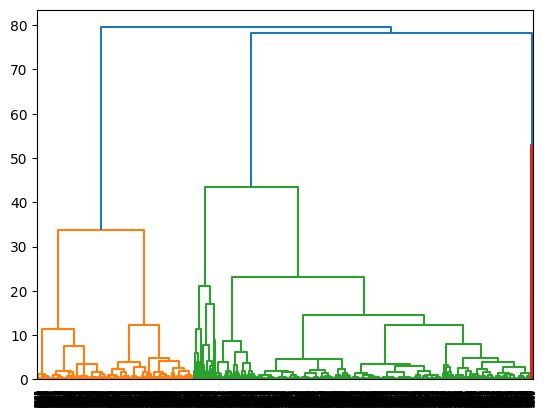

In [80]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_scaled , method = 'ward'))

Text(0, 0.5, 'silhouette_score')

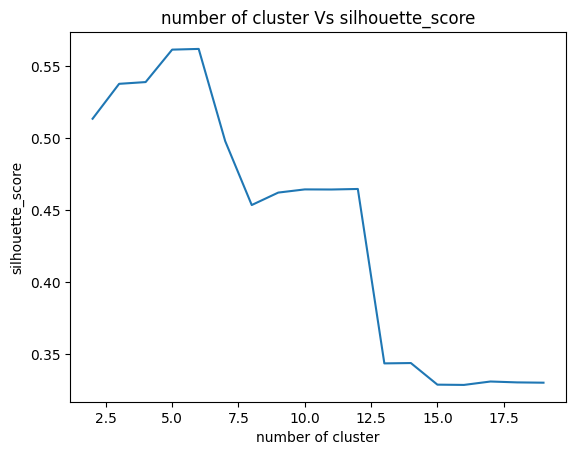

In [81]:
from sklearn.cluster import AgglomerativeClustering
scores = []

for i in range(2 , 20):
  agg = AgglomerativeClustering(n_clusters = i)
  y_hc = agg.fit_predict(data_scaled)
  scores.append(silhouette_score(data_scaled,y_hc))


plt.plot(range(2,20),scores)
plt.title('number of cluster Vs silhouette_score')
plt.xlabel('number of cluster')
plt.ylabel('silhouette_score')

In [82]:
scores

[0.5134442584900898,
 0.5376626221434326,
 0.5388854667320836,
 0.5613984511080243,
 0.5618869674115408,
 0.4978901118891509,
 0.4535616211971454,
 0.4621989908649106,
 0.4644061397022977,
 0.46433596812399797,
 0.4647044374414383,
 0.3436774483255776,
 0.3439144164472191,
 0.32892015073026176,
 0.3287346866285143,
 0.3311031812283658,
 0.3304900322136345,
 0.33028070647187385]

In [83]:
agg = AgglomerativeClustering(n_clusters = 5)
y_hc = agg.fit_predict(data_scaled)

[Text(0.5, 1.0, 'tsne on data with cluster label')]

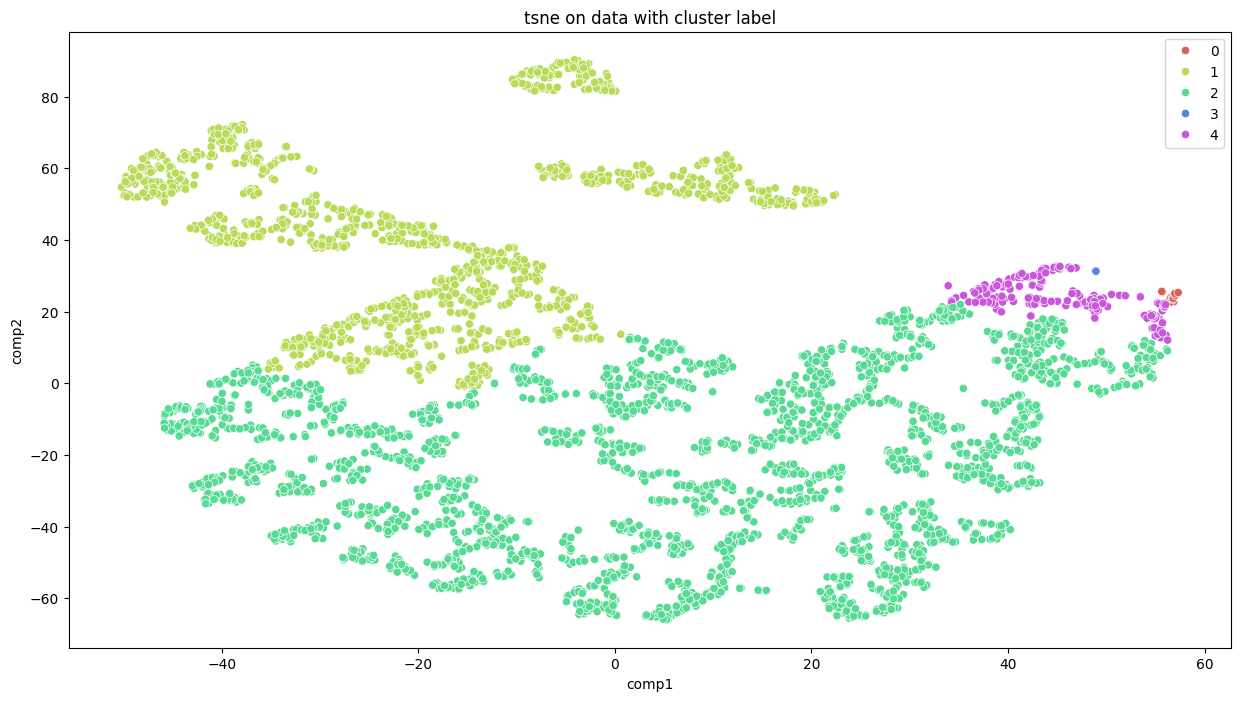

In [84]:
df3 = pd.DataFrame()
df3['comp1'] = z[:,0]
df3['comp2'] = z[:,1]
df3['y'] = y_hc

plt.figure(figsize=[15,8])
sns.scatterplot(x="comp1", y="comp2", hue=df3.y.tolist(),
                palette=sns.color_palette("hls", 5),
                data=df3).set(title="tsne on data with cluster label")

In [85]:
final_data_hc = pd.concat([data, pd.DataFrame(y_hc, columns=['label'])], axis = 1)
final_data_hc

,CustomerID,Recency,Frequancy,Monetary,label
0,12747.0,3,103,4196.01,2
1,12748.0,1,4592,33211.53,3
2,12749.0,4,199,4090.88,2
3,12820.0,4,59,942.34,2
4,12821.0,215,6,92.72,1
...,...,...,...,...,...
3898,18280.0,278,10,180.60,1
3899,18281.0,181,7,80.82,1
3900,18282.0,8,12,178.05,2
3901,18283.0,4,756,2094.88,4


In [94]:
final_data_hc.drop('CustomerID', axis =1).groupby('label').mean().sort_values(by='Recency')

,Recency,Frequancy,Monetary
label,,,
3,2.666667,5850.000000,46455.963333
4,14.445122,514.012195,8891.144695
0,20.142857,705.142857,64221.994286
2,35.510450,81.898714,1349.726484
1,219.778768,30.880875,500.292351


## DBSCAN

In [107]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.5 , min_samples= 5)
y_db = db.fit_predict(data_scaled)

In [108]:
np.unique(y_db)

array([-1,  0,  1])

[Text(0.5, 1.0, 'tsne on data with cluster label')]

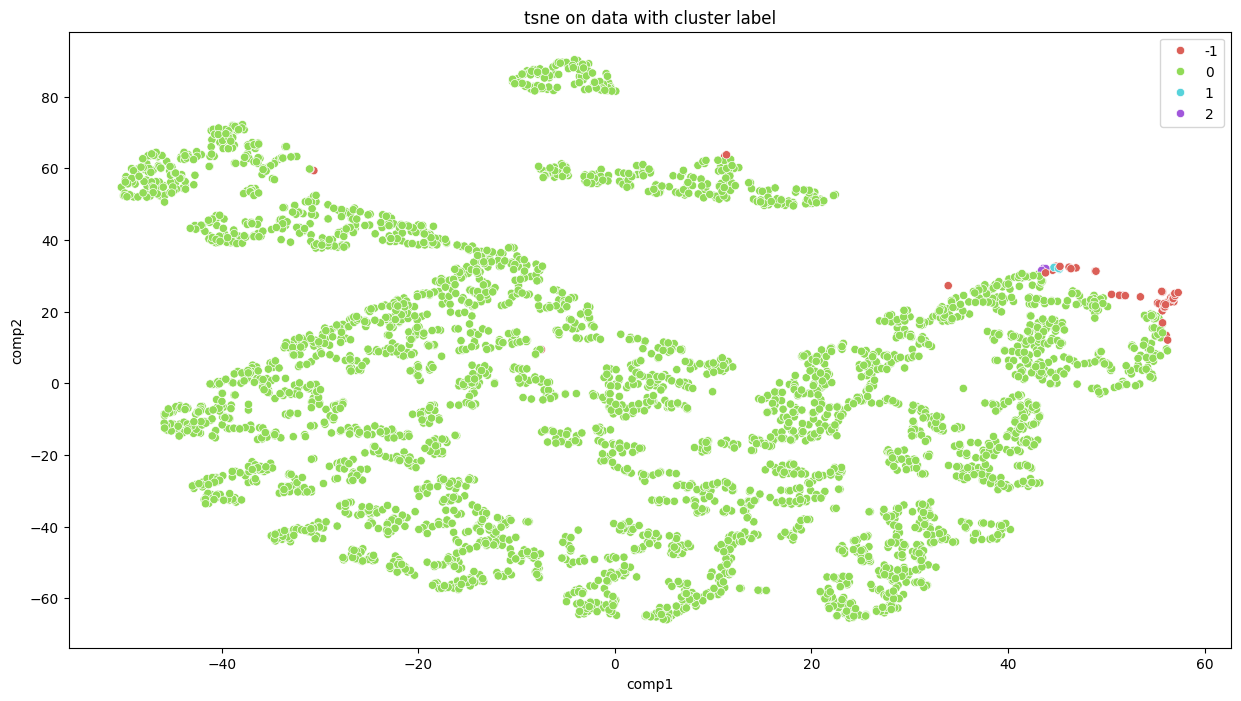

In [104]:
df4 = pd.DataFrame()
df4['comp1'] = z[:,0]
df4['comp2'] = z[:,1]
df4['y'] = y_db

plt.figure(figsize=[15,8])
sns.scatterplot(x="comp1", y="comp2", hue=df4.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df4).set(title="tsne on data with cluster label")

In [105]:
final_data_db = pd.concat([data, pd.DataFrame(y_db, columns=['label'])], axis = 1)
final_data_db

,CustomerID,Recency,Frequancy,Monetary,label
0,12747.0,3,103,4196.01,0
1,12748.0,1,4592,33211.53,-1
2,12749.0,4,199,4090.88,0
3,12820.0,4,59,942.34,0
4,12821.0,215,6,92.72,0
...,...,...,...,...,...
3898,18280.0,278,10,180.60,0
3899,18281.0,181,7,80.82,0
3900,18282.0,8,12,178.05,0
3901,18283.0,4,756,2094.88,0


In [106]:
final_data_db.drop('CustomerID',axis=1).groupby('label').describe().T

label                       -1             0             1            2
Recency   count      47.000000   3846.000000      5.000000     5.000000
          mean       45.531915     93.598024      5.800000    13.800000
          std        90.686956     99.575905      5.932959    11.166915
          min         1.000000      1.000000      2.000000     6.000000
          25%         2.000000     19.000000      2.000000     6.000000
          50%         5.000000     52.000000      3.000000    11.000000
          75%        19.000000    145.000000      6.000000    13.000000
          max       373.000000    374.000000     16.000000    33.000000
Frequancy count      47.000000   3846.000000      5.000000     5.000000
          mean      978.148936     77.311492   1118.600000   937.000000
          std      1471.045413    101.376091     21.314314    38.697545
          min         3.000000      1.000000   1090.000000   898.000000
          25%       210.000000     16.000000   1106.000000   899.000000
          50%       543.000000     40.000000   1119.000000   937.000000
          75%       998.000000     97.000000   1137.000000   970.000000
          max      7847.000000    799.000000   1141.000000   981.000000
Monetary  count      47.000000   3846.000000      5.000000     5.000000
          mean    32151.130426   1273.344712   8408.972000  4334.408000
          std     31298.104284   1862.232049   1570.431710   782.710762
          min      2027.870000      2.900000   6316.570000  3062.400000
          25%     10917.990000    290.877500   8022.490000  4154.640000
          50%     26897.680000    626.880000   8214.650000  4604.220000
          75%     44374.910000   1482.160000   8816.400000  4805.170000
          max    187008.520000  17286.860000  10674.750000  5045.610000

In [112]:
db_tune = DBSCAN(eps = 0.1 , min_samples= 3)
y_db_tune = db_tune.fit_predict(data_scaled)
np.unique(y_db_tune)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

[Text(0.5, 1.0, 'tsne on data with cluster label')]

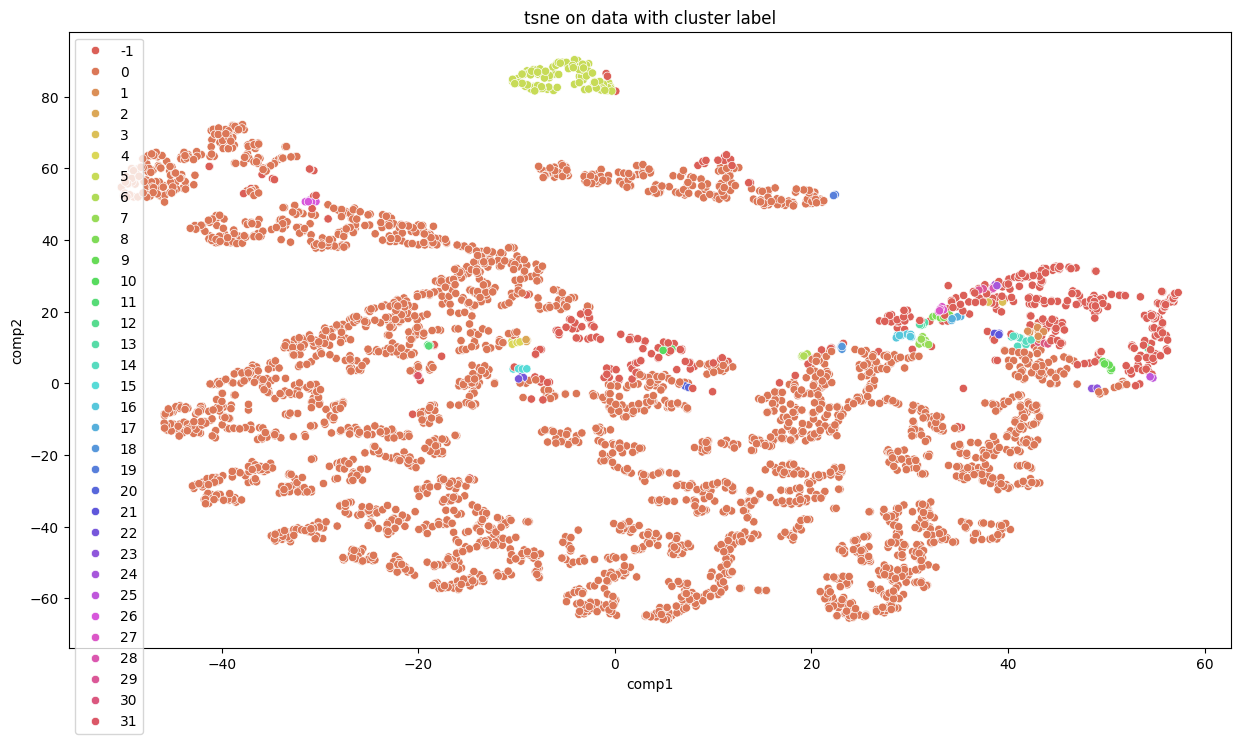

In [113]:
df5 = pd.DataFrame()
df5['comp1'] = z[:,0]
df5['comp2'] = z[:,1]
df5['y'] = y_db_tune

plt.figure(figsize=[15,8])
sns.scatterplot(x="comp1", y="comp2", hue=df5.y.tolist(),
                palette=sns.color_palette("hls", 33),
                data=df5).set(title="tsne on data with cluster label")